In [26]:
import pandas as pd
%matplotlib inline

In [2]:
tokens = pd.read_csv('tokens_with_gram_and_dist_v2.csv', encoding='cp1251')
tokens = tokens.drop('Unnamed: 0', 1)
tokens.head(10)

,doc_id,shift_o,length_o,token,lemma,gram,ID,variant,group_id,chain_id,...,content,tk_shifts,attributes,head,hd_shifts,anaph,PoS,count,dist_to_ant,gend
0,1,0,2,Во,во,Sp-a,1-0,-,-,-,...,-,-,-,-,-,-,S,NaN,NaN,NaN
1,1,3,5,время,время,Ncnsan,1-3,-,-,-,...,-,-,-,-,-,-,N,s,NaN,n
2,1,9,5,своих,свой,P---pga,1-9,1.0,407840.0,1070.0,...,своих,9,ref:def|str:refl|type:coref,-,-,0.0,P,p,NaN,NaN
3,1,15,8,прогулок,прогулка,Ncfpgn,1-15,-,-,-,...,-,-,-,-,-,-,N,p,NaN,f
4,1,24,1,в,в,Sp-l,1-24,-,-,-,...,-,-,-,-,-,-,S,NaN,NaN,NaN
5,1,26,12,окрестностях,окрестность,Ncfpln,1-26,-,-,-,...,-,-,-,-,-,-,N,p,NaN,f
6,1,39,7,Симеиза,симеиза,Ncmsgn,1-39,-,-,-,...,-,-,-,-,-,-,N,s,NaN,m
7,1,47,1,я,я,P-1-snn,1-47,1.0,407839.0,1070.0,...,я,47,ref:def|str:pron|type:coref,-,-,0.0,P,s,NaN,-
8,1,49,7,обратил,обратить,Vmis-sma-p,1-49,-,-,-,...,-,-,-,-,-,-,V,NaN,NaN,NaN
9,1,57,8,внимание,внимание,Ncnsan,1-57,-,-,-,...,-,-,-,-,-,-,N,s,NaN,n


In [3]:
len(tokens['anaph'].loc[tokens['anaph']=='1.0'])

2859

In [4]:
from tqdm import tqdm_notebook as tqdm
from string import punctuation

In [5]:
sum(tokens['lemma']=='.')

7738

In [33]:
anaphora = pd.DataFrame({"target": [], "t_gend": [], "t_count": [],
                         "c_gend": [], "c_count": [], 'c_pow': [],
                         'dist': [], 'answ': [], 'is_punct':[], 'same_count':[], 'same_gend':[]})

not_found = []

def add_anaphora(i, row, anaphora):
    anaphora_local = pd.DataFrame({"target": [], "t_gend": [], "t_count": [],
                         "c_gend": [], "c_count": [], 'c_pow': [],
                         'dist': [], 'answ': [], 'is_punct':[], 'same_count':[], 'same_gend':[]})
    counter_words = 0
    #print(i, row)
    found_answ = False
    shift = row['shift']
    target_link = row['link']
    target = row['lemma']

    target_gend = row['gend']
    target_count = row['count']

    number_added = 0
    is_punct = 0
    c = 0
    while counter_words < 25:
        c += 1
        if tokens.iloc[i-c-1]['lemma'] in punctuation:
            #print(tokens.iloc[i-c-1]['lemma'], )
            is_punct = 1
        else:
            counter_words += 1
            cand_gend = tokens.iloc[i - c - 1]['gend']
            cand_count = tokens.iloc[i -c - 1]['count']
            cand_pos = tokens.iloc[i - c - 1]['PoS']
            
            dist = counter_words
            number_added += 1
            #print('yay')
            if tokens.iloc[i - c - 1]['group_id'] == target_link:
                answ = 1
                found_answ = True
            else:
                answ = 0
            same_count = (target_count == cand_count)
            same_gend = (target_gend == cand_gend)
            # print('STP8')

            anaphora_local.loc[len(anaphora_local) + 1] = [answ, cand_count, cand_gend, cand_pos, dist, is_punct,
                                               same_count, same_gend, target_count,
                                               target_gend, target]
            #print(len(anaphora_local))
    if found_answ:
        #print(len(pd.concat([anaphora, anaphora_local])), 'concat')
        return pd.concat([anaphora, anaphora_local])

    else:
        #print('WARNING: answ_not_found for ', row.values)
        not_found.append([target, shift, i])
        return anaphora

In [34]:
for i, row in tqdm(tokens.loc[tokens['anaph']=='1.0'].iterrows()):
    counter_words = 0;
    #print(i)
    i = int(i)
    #print(row.values)
    if row['link'] != '0.0' and row['dist_to_ant']>0:
        #print('yay')
        anaphora = add_anaphora(i, row, anaphora)
    #if i > 1000:
    #    break
print(len(not_found))
anaphora = anaphora.fillna('-').reset_index(drop=True)
anaphora



151


,index,answ,c_count,c_gend,c_pow,dist,is_punct,same_count,same_gend,t_count,t_gend,target
0,1,0.0,p,f,N,1.0,1.0,1.0,0.0,p,-,они
1,2,0.0,p,m,A,2.0,1.0,1.0,0.0,p,-,они
2,3,1.0,p,m,N,3.0,1.0,1.0,0.0,p,-,они
3,4,0.0,p,m,A,4.0,1.0,1.0,0.0,p,-,они
4,5,0.0,s,f,N,5.0,1.0,0.0,0.0,p,-,они
5,6,0.0,-,-,S,6.0,1.0,0.0,0.0,p,-,они
6,7,0.0,s,m,N,7.0,1.0,0.0,0.0,p,-,они
7,8,0.0,-,-,S,8.0,1.0,0.0,0.0,p,-,они
8,9,0.0,-,-,V,9.0,1.0,0.0,0.0,p,-,они
9,10,0.0,-,-,Q,10.0,1.0,0.0,0.0,p,-,они


In [72]:
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import seaborn as sns

In [73]:
le_count = LabelEncoder()
le_gend = LabelEncoder()
le_c_pos = LabelEncoder()
le_target = LabelEncoder()
anaphora['c_count'] = le_count.fit_transform(anaphora['c_count'])
anaphora['c_gend'] = le_gend.fit_transform(anaphora['c_gend'])
anaphora['t_count'] = le_count.fit_transform(anaphora['t_count'])
anaphora['t_gend'] = le_gend.fit_transform(anaphora['t_gend'])
anaphora['c_pow'] = le_c_pos.fit_transform(anaphora['c_pow'])
anaphora['target'] = le_target.fit_transform(anaphora['target'])
print(anaphora.columns)
anaphora.isnull().values.any()

Index(['index', 'answ', 'c_count', 'c_gend', 'c_pow', 'dist', 'is_punct',
       'same_count', 'same_gend', 't_count', 't_gend', 'target'],
      dtype='object')


False

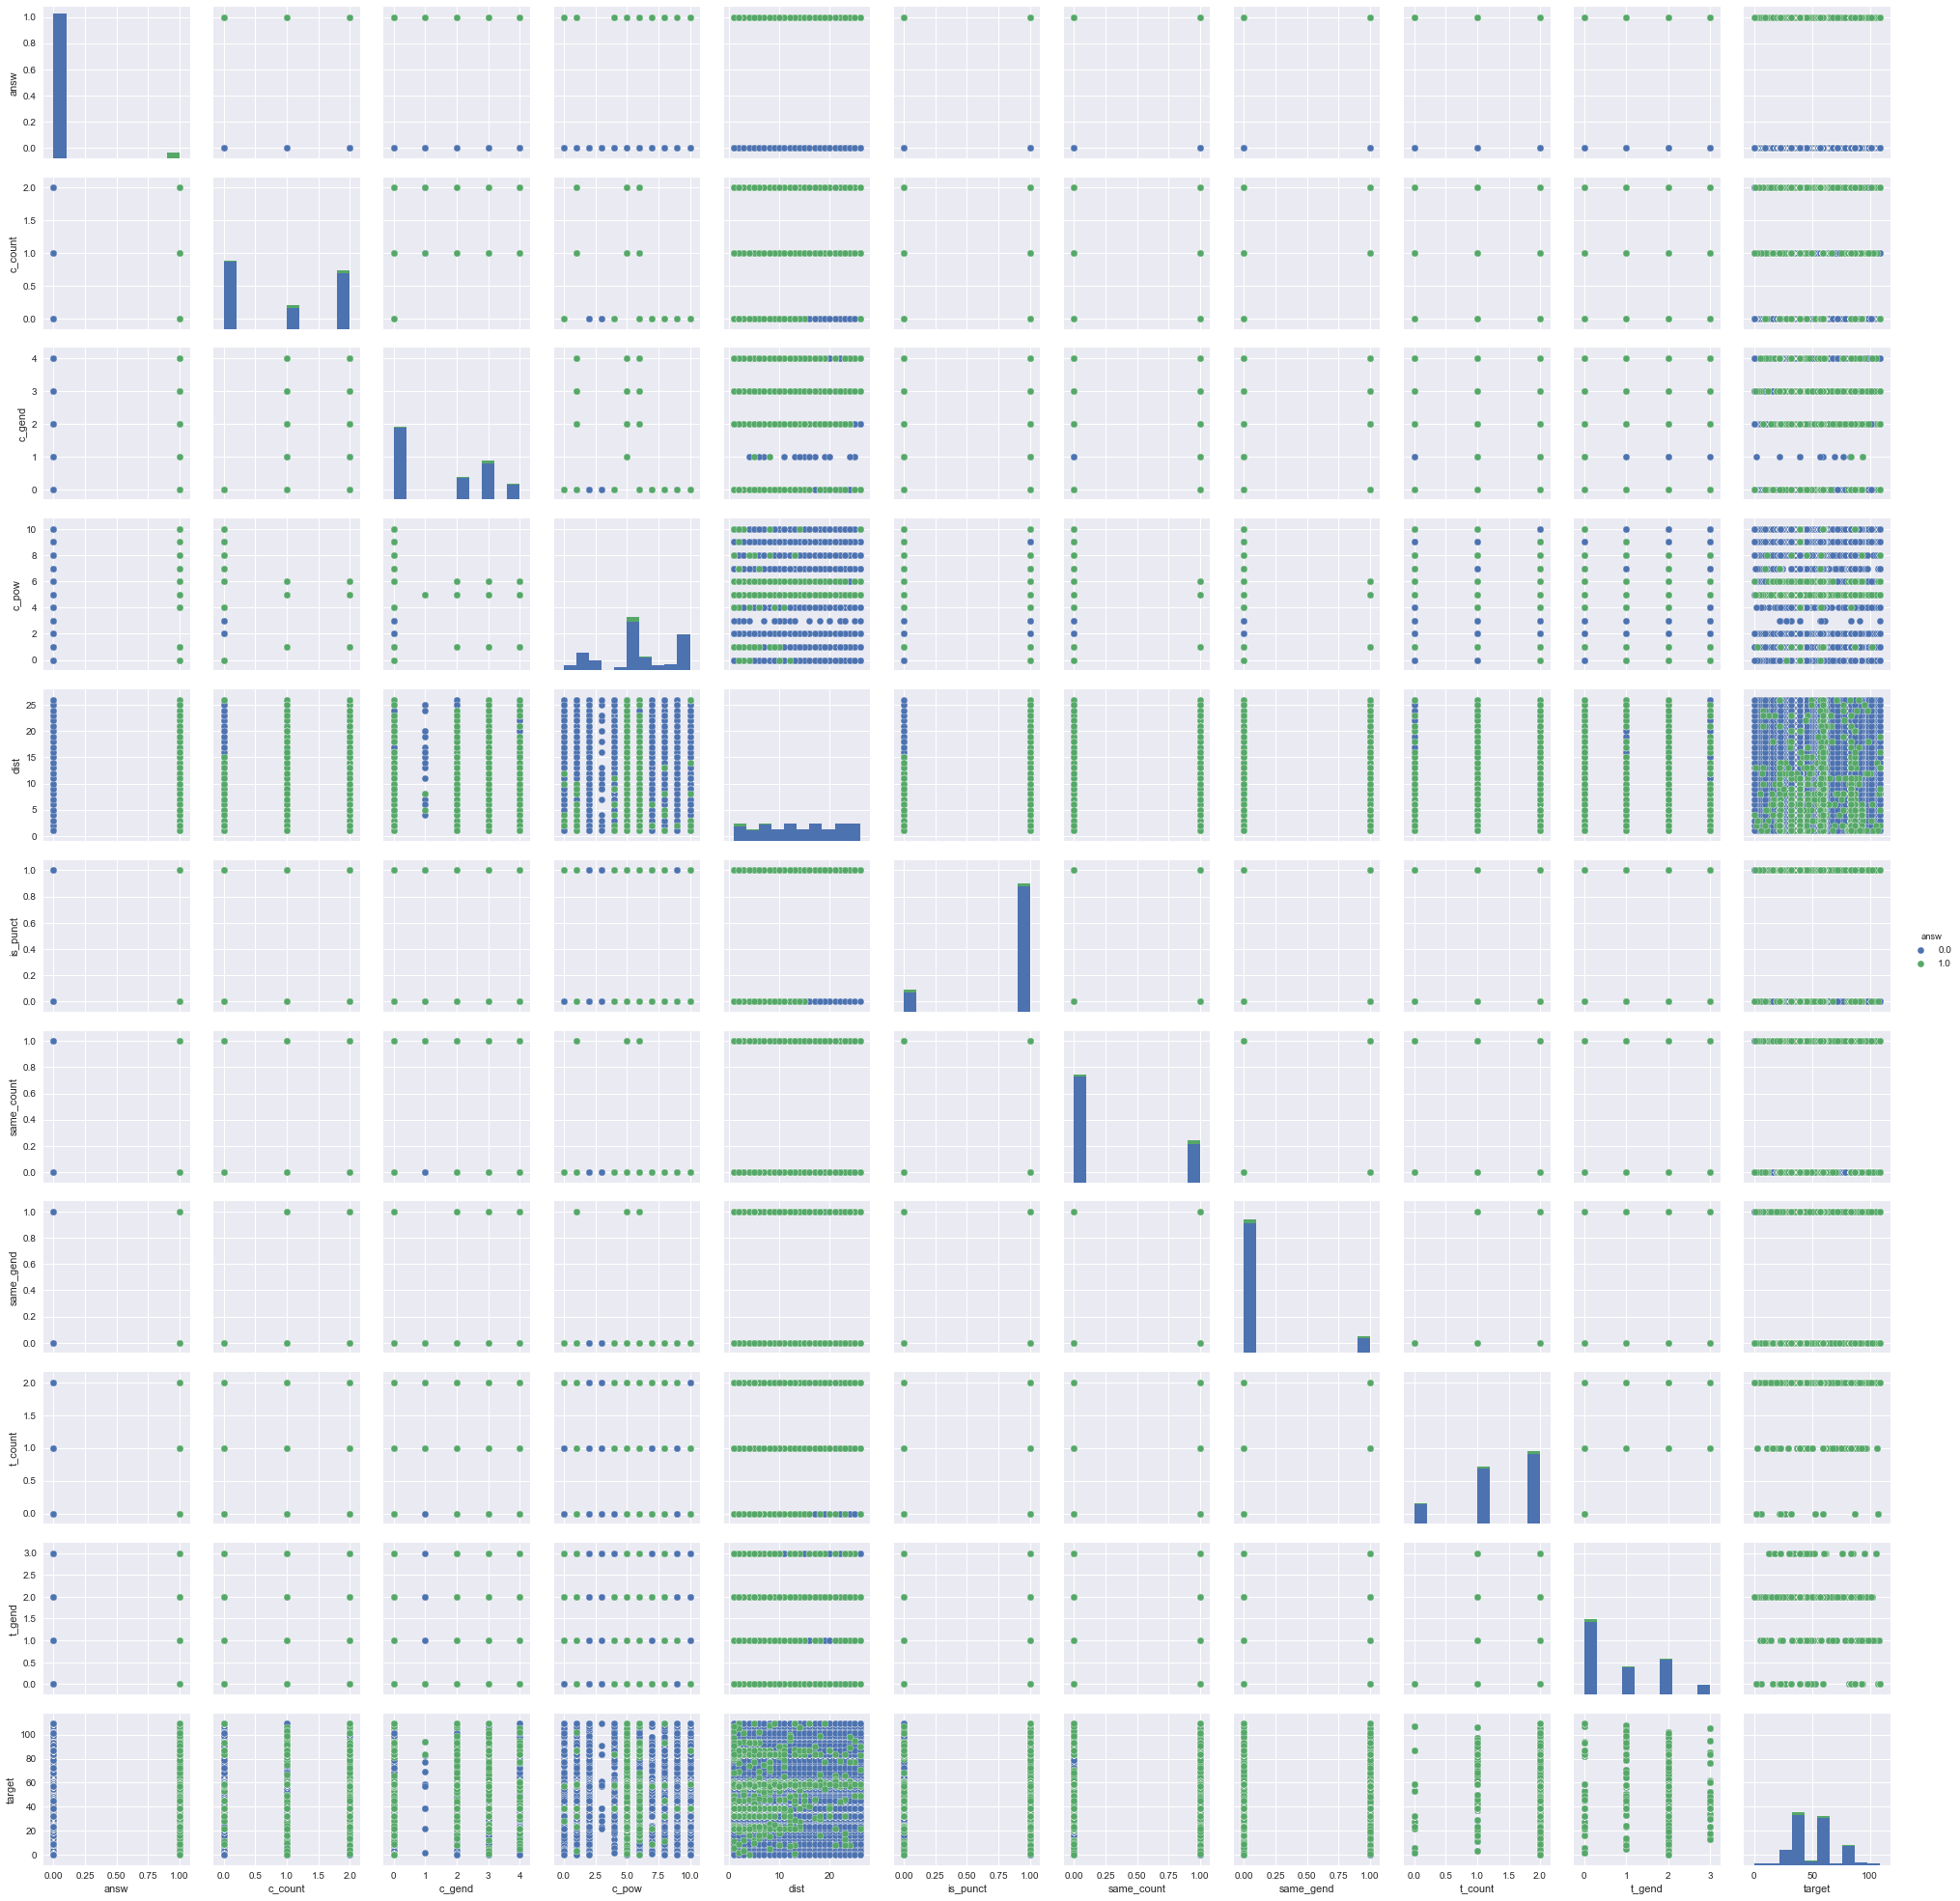

In [27]:
sns.pairplot(anaphora, hue="answ")
sns.plt.show()

In [121]:
anaphora = anaphora.sample(frac=1).reset_index(drop=True)#.drop('index',1)
anaphora.head()

,answ,c_count,c_gend,c_pow,dist,is_punct,same_count,same_gend,t_count,t_gend,target
0,0.0,0,0,9,10.0,1.0,0.0,0.0,2,2,39
1,0.0,0,0,9,11.0,1.0,0.0,0.0,1,1,104
2,0.0,2,3,1,7.0,1.0,0.0,0.0,1,0,59
3,0.0,0,0,10,7.0,0.0,0.0,0.0,1,0,39
4,0.0,2,3,5,5.0,0.0,1.0,0.0,2,1,45


In [123]:
for_work = anaphora.loc[:29999,:]
for_evaluation = anaphora.loc[30000:,:]

for_simp = for_work.loc[:10000,:]
train, test = train_test_split(for_simp, test_size=0.3, random_state=29)
features = ['c_count', 'c_gend', 'c_pow', 'dist', 'is_punct',
       'same_count', 'same_gend', 't_count', 't_gend', 'target']

#auc = accuracy_score()

In [116]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(n_jobs=-1)#,class_weight='balanced')
param_grid = {'class_weight':[{1:5, 0:1},'balanced', {1:3, 0:1}], 'n_estimators':[5,10, 20, 50], 
              'max_features':[None, 'log2', 'auto'], 'max_depth':[10,50,None], 'min_samples_split':[2,5,10,20]}


clf = GridSearchCV(rf, param_grid, n_jobs=-1, pre_dispatch='2*n_jobs', return_train_score=True)
#print(len(train[features]), len(train['answ']))
clf.fit(train[features], train['answ'])
print(classification_report(test['answ'], clf.predict(test[features])))


             precision    recall  f1-score   support

        0.0       0.98      0.99      0.98      2880
        1.0       0.62      0.48      0.54       121

avg / total       0.96      0.97      0.97      3001



In [117]:
print(clf.best_estimator_ )
#clf.cv_results_

RandomForestClassifier(bootstrap=True, class_weight={1: 3, 0: 1},
            criterion='gini', max_depth=10, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [101]:
import numpy as np

In [105]:
lr = LogisticRegression(solver='sag')#class_weight='balanced')

param_grid = {'class_weight':[{1:5, 0:1}, 'balanced'], 
              'C':np.arange(0.1, 1.0, 0.1), 'max_iter':[50,100,500]}
clf_1 = GridSearchCV(lr, param_grid,  n_jobs=-1, return_train_score=True)

clf_1.fit(train[features], train['answ'])
print(classification_report(test['answ'], clf_1.predict(test[features])))
clf_1.best_estimator_ 

C:\Users\Ksenia\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


             precision    recall  f1-score   support

        0.0       0.98      0.95      0.97      2880
        1.0       0.36      0.63      0.46       121

avg / total       0.96      0.94      0.95      3001



LogisticRegression(C=0.30000000000000004, class_weight={1: 5, 0: 1},
          dual=False, fit_intercept=True, intercept_scaling=1, max_iter=50,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='sag', tol=0.0001, verbose=0, warm_start=False)

In [86]:
ad = AdaBoostClassifier()
ad.fit(train[features], train['answ'])
print(classification_report(test['answ'], ad.predict(test[features])))

             precision    recall  f1-score   support

        0.0       0.97      0.99      0.98      2306
        1.0       0.52      0.24      0.33        95

avg / total       0.95      0.96      0.95      2401



In [129]:
correct = for_work.loc[anaphora['answ']==1]
incorrect = for_work.loc[anaphora['answ']==0]
sample_data = pd.concat([correct, incorrect.sample(2*len(correct))])
print(len(correct), len(incorrect))
samp_train, samp_test = train_test_split(sample_data, test_size=0.2, random_state=17)
len(sample_data)

1210 28790


3630

In [135]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(n_jobs=-1)#,class_weight='balanced')
param_grid = {'class_weight':[{1:5, 0:1},'balanced', {1:3, 0:1}], 'n_estimators':[20, 25, 35, 45, 50], 
              'max_features':[None, 'log2', 'auto'], 'max_depth':[10,50,None], 'min_samples_split':[2,5,10,20]}


clf = GridSearchCV(rf, param_grid, n_jobs=-1, pre_dispatch='2*n_jobs', return_train_score=True)
#print(len(train[features]), len(train['answ']))
clf.fit(samp_train[features], samp_train['answ'])
print(classification_report(samp_test['answ'], clf.predict(samp_test[features])))
print(clf.best_estimator_ )

             precision    recall  f1-score   support

        0.0       0.94      0.86      0.90       489
        1.0       0.75      0.88      0.81       237

avg / total       0.88      0.87      0.87       726

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=10, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=35, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [131]:
lr = LogisticRegression(solver='sag')#class_weight='balanced')

param_grid = {'class_weight':[{1:5, 0:1}, 'balanced'], 
              'C':np.arange(0.1, 1.0, 0.1), 'max_iter':[50,100,500]}
clf_1 = GridSearchCV(lr, param_grid,  n_jobs=-1, return_train_score=True)

clf_1.fit(samp_train[features], samp_train['answ'])
print(classification_report(samp_test['answ'], clf_1.predict(samp_test[features])))
clf_1.best_estimator_ 

             precision    recall  f1-score   support

        0.0       0.93      0.81      0.86       489
        1.0       0.69      0.86      0.77       237

avg / total       0.85      0.83      0.83       726



LogisticRegression(C=0.90000000000000002, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=500,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='sag', tol=0.0001, verbose=0, warm_start=False)